<a href="https://colab.research.google.com/github/zberis/DSPS_ZBeris/blob/main/hw7/homework7zoeberis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import sklearn.cluster
from sklearn import mixture
from scipy.cluster.vq import kmeans2

In [ ]:
import os, json
# this mounts your google drive
from google.colab import drive
drive.mount("/content/drive")
# this gets you to your drive folder
%cd drive/MyDrive/
# this makes sure the file is there: this cell should return "kaggle.json"
!ls kaggle.json
# this limits who can view and make changes who can access this file.
!chmod 600 kaggle.json
# this reads in the file and stores it into the system variables of your colab sessions which allows you to connect programmatically to the kaggle platform
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = "e60b57c215e877e01a22375a3058eec1"#envs['key']

Mounted at /content/drive
/content/drive/MyDrive
kaggle.json


### Import data || Task 2
---



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jainaru/world-happiness-report-2024-yearly-updated")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'world-happiness-report-2024-yearly-updated' dataset.
Path to dataset files: /kaggle/input/world-happiness-report-2024-yearly-updated


In [ ]:
hapiness = pd.read_csv("/kaggle/input/world-happiness-report-2024-yearly-updated/World-happiness-report-2024.csv", encoding = "latin-1")

In [ ]:
hapiness.head()

,Country name,Regional indicator,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,Western Europe,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,Western Europe,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,Western Europe,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,Middle East and North Africa,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [ ]:
hapiness = hapiness.dropna()

### scaling || Task 3

In [ ]:
hapiness.insert(3, "Ladder Score Minmax", (hapiness["Ladder score"]-hapiness["Ladder score"].min())/ (hapiness["Ladder score"].max()-hapiness["Ladder score"].min()), True)
hapiness.insert(5, "upperwhisker Minmax", (hapiness["upperwhisker"] - hapiness["upperwhisker"].min()) / (hapiness["upperwhisker"].max() - hapiness["upperwhisker"].min()), True )
hapiness.insert(7, "lowerwhisker Minmax", (hapiness["lowerwhisker"] - hapiness["lowerwhisker"].min()) / (hapiness["lowerwhisker"].max() - hapiness["lowerwhisker"].min()), True )
hapiness.insert(9, "Log GDP per capita Minmax", (hapiness["Log GDP per capita"] - hapiness["Log GDP per capita"].min()) / (hapiness["Log GDP per capita"].max() - hapiness["Log GDP per capita"].min()), True )
hapiness.insert(11, "Social support Minmax", (hapiness["Social support"] - hapiness["Social support"].min()) / (hapiness["Social support"].max() - hapiness["Social support"].min()), True )
hapiness.insert(13, "Healthy life expectancy Minmax", (hapiness["Healthy life expectancy"] - hapiness["Healthy life expectancy"].min()) / (hapiness["Healthy life expectancy"].max() - hapiness["Healthy life expectancy"].min()), True )
hapiness.insert(15, "Freedom to make life choices Minmax", (hapiness["Freedom to make life choices"] - hapiness["Freedom to make life choices"].min()) / (hapiness["Freedom to make life choices"].max() - hapiness["Freedom to make life choices"].min()), True)
hapiness.insert(17, "Generosity Minmax", (hapiness["Generosity"] - hapiness["Generosity"].min()) / (hapiness["Generosity"].max() - hapiness["Generosity"].min()), True)
hapiness.insert(19, "Perceptions of corruption Minmax", (hapiness["Perceptions of corruption"] - hapiness["Perceptions of corruption"].min()) / (hapiness["Perceptions of corruption"].max() - hapiness["Perceptions of corruption"].min()), True)
hapiness.insert(21, "Dystopia + residual Minmax", (hapiness["Dystopia + residual"] - hapiness["Dystopia + residual"].min()) / (hapiness["Dystopia + residual"].max() - hapiness["Dystopia + residual"].min()), True)


In [ ]:
hapiness.insert(4, "Ladder Score Standardized", (hapiness["Ladder score"] - hapiness["Ladder score"].mean()) / hapiness["Ladder score"].std(), True)
hapiness.insert(7, "upperwhisker Standardized", (hapiness["upperwhisker"] - hapiness["upperwhisker"].mean()) / hapiness["upperwhisker"].std(), True )
hapiness.insert(10, "lowerwhisker Standardized", (hapiness["lowerwhisker"] - hapiness["lowerwhisker"].mean()) / hapiness["lowerwhisker"].std(), True )
hapiness.insert(13, "Log GDP per capita Standardized", (hapiness["Log GDP per capita"] - hapiness["Log GDP per capita"].mean()) / hapiness["Log GDP per capita"].std(), True )
hapiness.insert(16, "Social support Standardized", (hapiness["Social support"] - hapiness["Social support"].mean()) / hapiness["Social support"].std(), True )
hapiness.insert(19, "Healthy life expectancy Standardized", (hapiness["Healthy life expectancy"] - hapiness["Healthy life expectancy"].mean()) / hapiness["Healthy life expectancy"].std(), True )
hapiness.insert(22, "Freedom to make life choices Standardized", (hapiness["Freedom to make life choices"] - hapiness["Freedom to make life choices"].mean()) / hapiness["Freedom to make life choices"].std(), True)
hapiness.insert(25, "Generosity Standardized", (hapiness["Generosity"] - hapiness["Generosity"].mean()) / hapiness["Generosity"].std(), True)
hapiness.insert(28, "Perceptions of corruption Standardized", (hapiness["Perceptions of corruption"] - hapiness["Perceptions of corruption"].mean()) / hapiness["Perceptions of corruption"].std(), True)
hapiness.insert(31, "Dystopia + residual Standardized", (hapiness["Dystopia + residual"] - hapiness["Dystopia + residual"].mean()) / hapiness["Dystopia + residual"].std(), True)


In [ ]:
hapiness.head()

,Country name,Regional indicator,Ladder score,Ladder Score Minmax,Ladder Score Standardized,upperwhisker,upperwhisker Minmax,upperwhisker Standardized,lowerwhisker,lowerwhisker Minmax,...,Freedom to make life choices Standardized,Generosity,Generosity Minmax,Generosity Standardized,Perceptions of corruption,Perceptions of corruption Minmax,Perceptions of corruption Standardized,Dystopia + residual,Dystopia + residual Minmax,Dystopia + residual Standardized
0,Finland,Western Europe,7.741,1.000000,1.870995,7.815,1.000000,1.863298,7.667,1.000000,...,1.467019,0.142,0.354115,-0.058161,0.546,0.949565,3.104279,2.082,0.701726,0.941628
1,Denmark,Western Europe,7.583,0.973754,1.737238,7.665,0.975166,1.734555,7.500,0.972167,...,1.245469,0.204,0.508728,0.786051,0.548,0.953043,3.120122,1.881,0.636275,0.567645
2,Iceland,Western Europe,7.525,0.964120,1.688138,7.618,0.967384,1.694215,7.433,0.961000,...,1.220853,0.258,0.643392,1.521332,0.182,0.316522,0.220841,2.050,0.691306,0.882088
3,Sweden,Western Europe,7.344,0.934053,1.534910,7.422,0.934934,1.525990,7.267,0.933333,...,1.337782,0.221,0.551122,1.017528,0.524,0.911304,2.930006,1.658,0.563660,0.152729
4,Israel,Middle East and North Africa,7.341,0.933555,1.532370,7.405,0.932119,1.511399,7.277,0.935000,...,0.125413,0.153,0.381546,0.091618,0.193,0.335652,0.307978,2.298,0.772061,1.343519


### Task 4

For plotting, we are using the seaborn library, which was recommended by ChatGPT. The initial code was written by ChatGPT, but then altered by us.

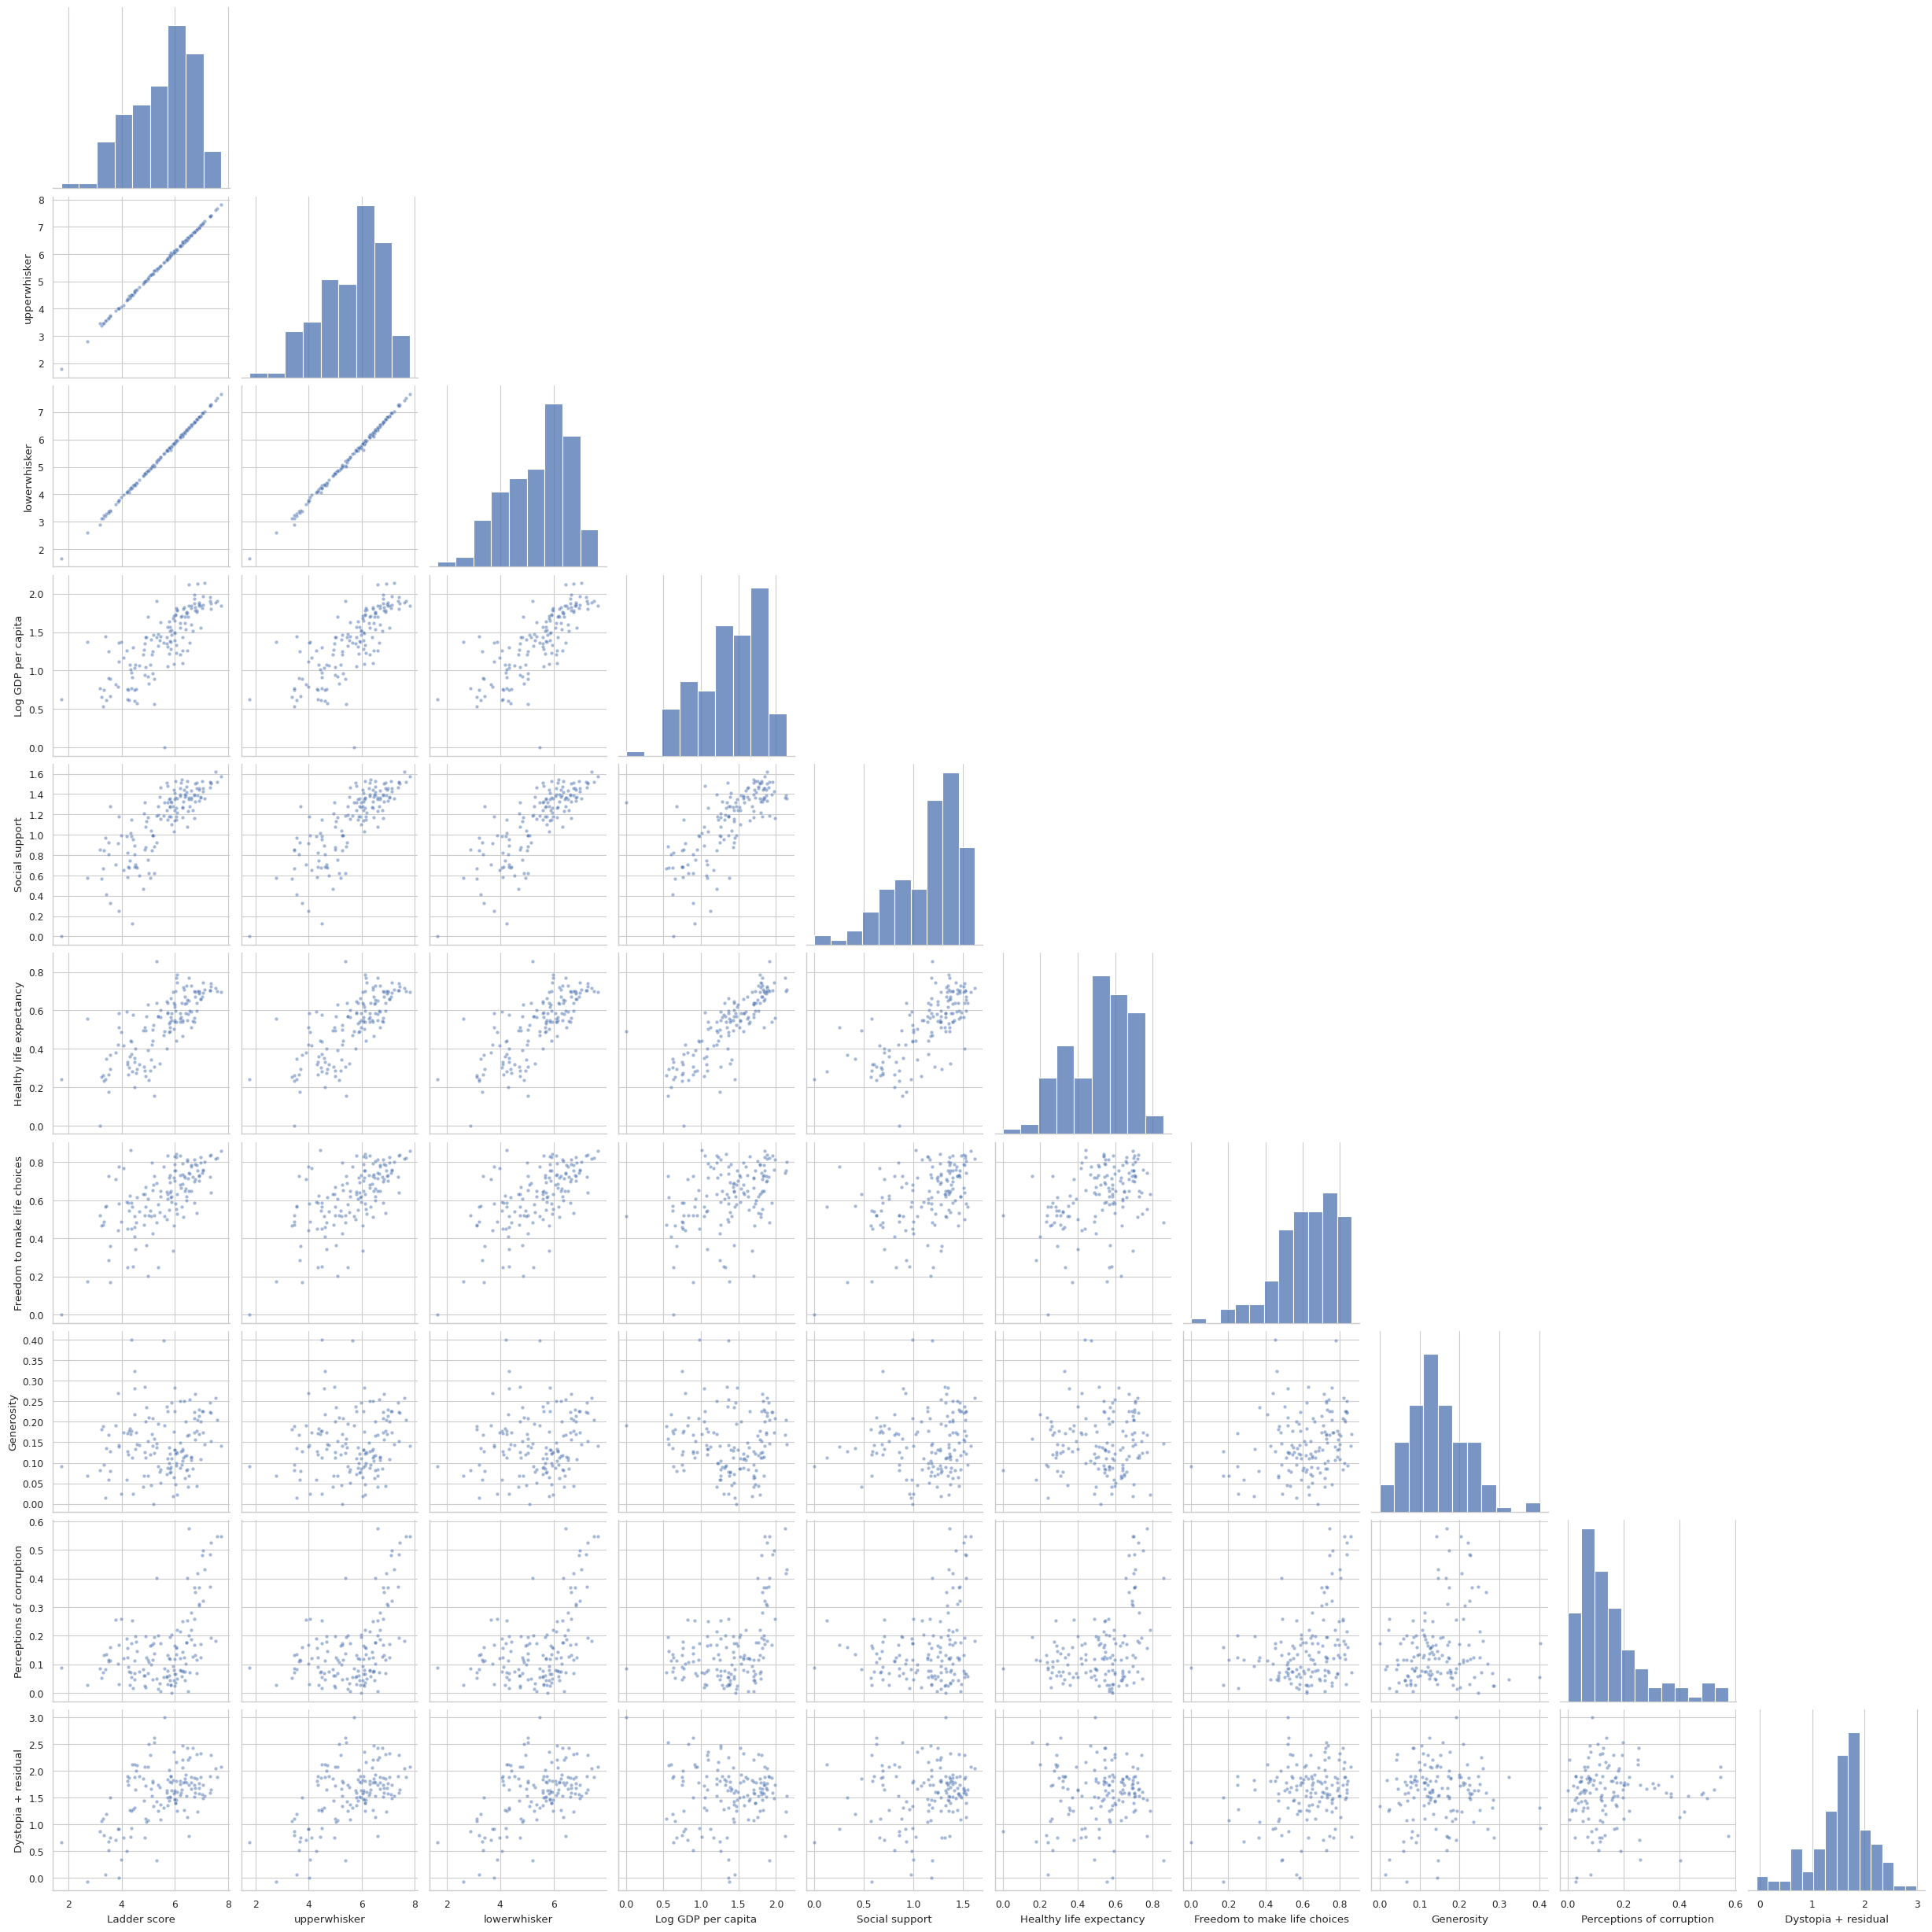

In [ ]:
cols = [
    "Ladder score",
    "upperwhisker",
    "lowerwhisker",
    "Log GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
    "Dystopia + residual"
]

sns.set(style="whitegrid", context="paper")
sns.pairplot(hapiness[cols], corner=True, plot_kws={'s': 10, 'alpha': 0.5})
plt.show()

Figure 1: This is a matrix of scatterplots, for each numerical X Y pairing that is possible from the datatset World Happiness Report 2024. At the top of each column is a histrogram of the values for that columns label. As we can see, some of the values are very skewed, for instance, Ladder Score, Log GDP per capita, Social Support, Healthy Life Expectancy, and Freedom to Make Life Choices are all skewed to the right. Generocity and Perceptions of Corruption are skewed to the left. Dystopia + Residual seems to not be skewed. Each dot represents data from a specific country, in the scatter plots. One interesting thing, is that generosity does not seem to have a positive or negative correlation with anything. The Log GDP Per Capita and Healthy life expectancy seem to have a very high correlation.

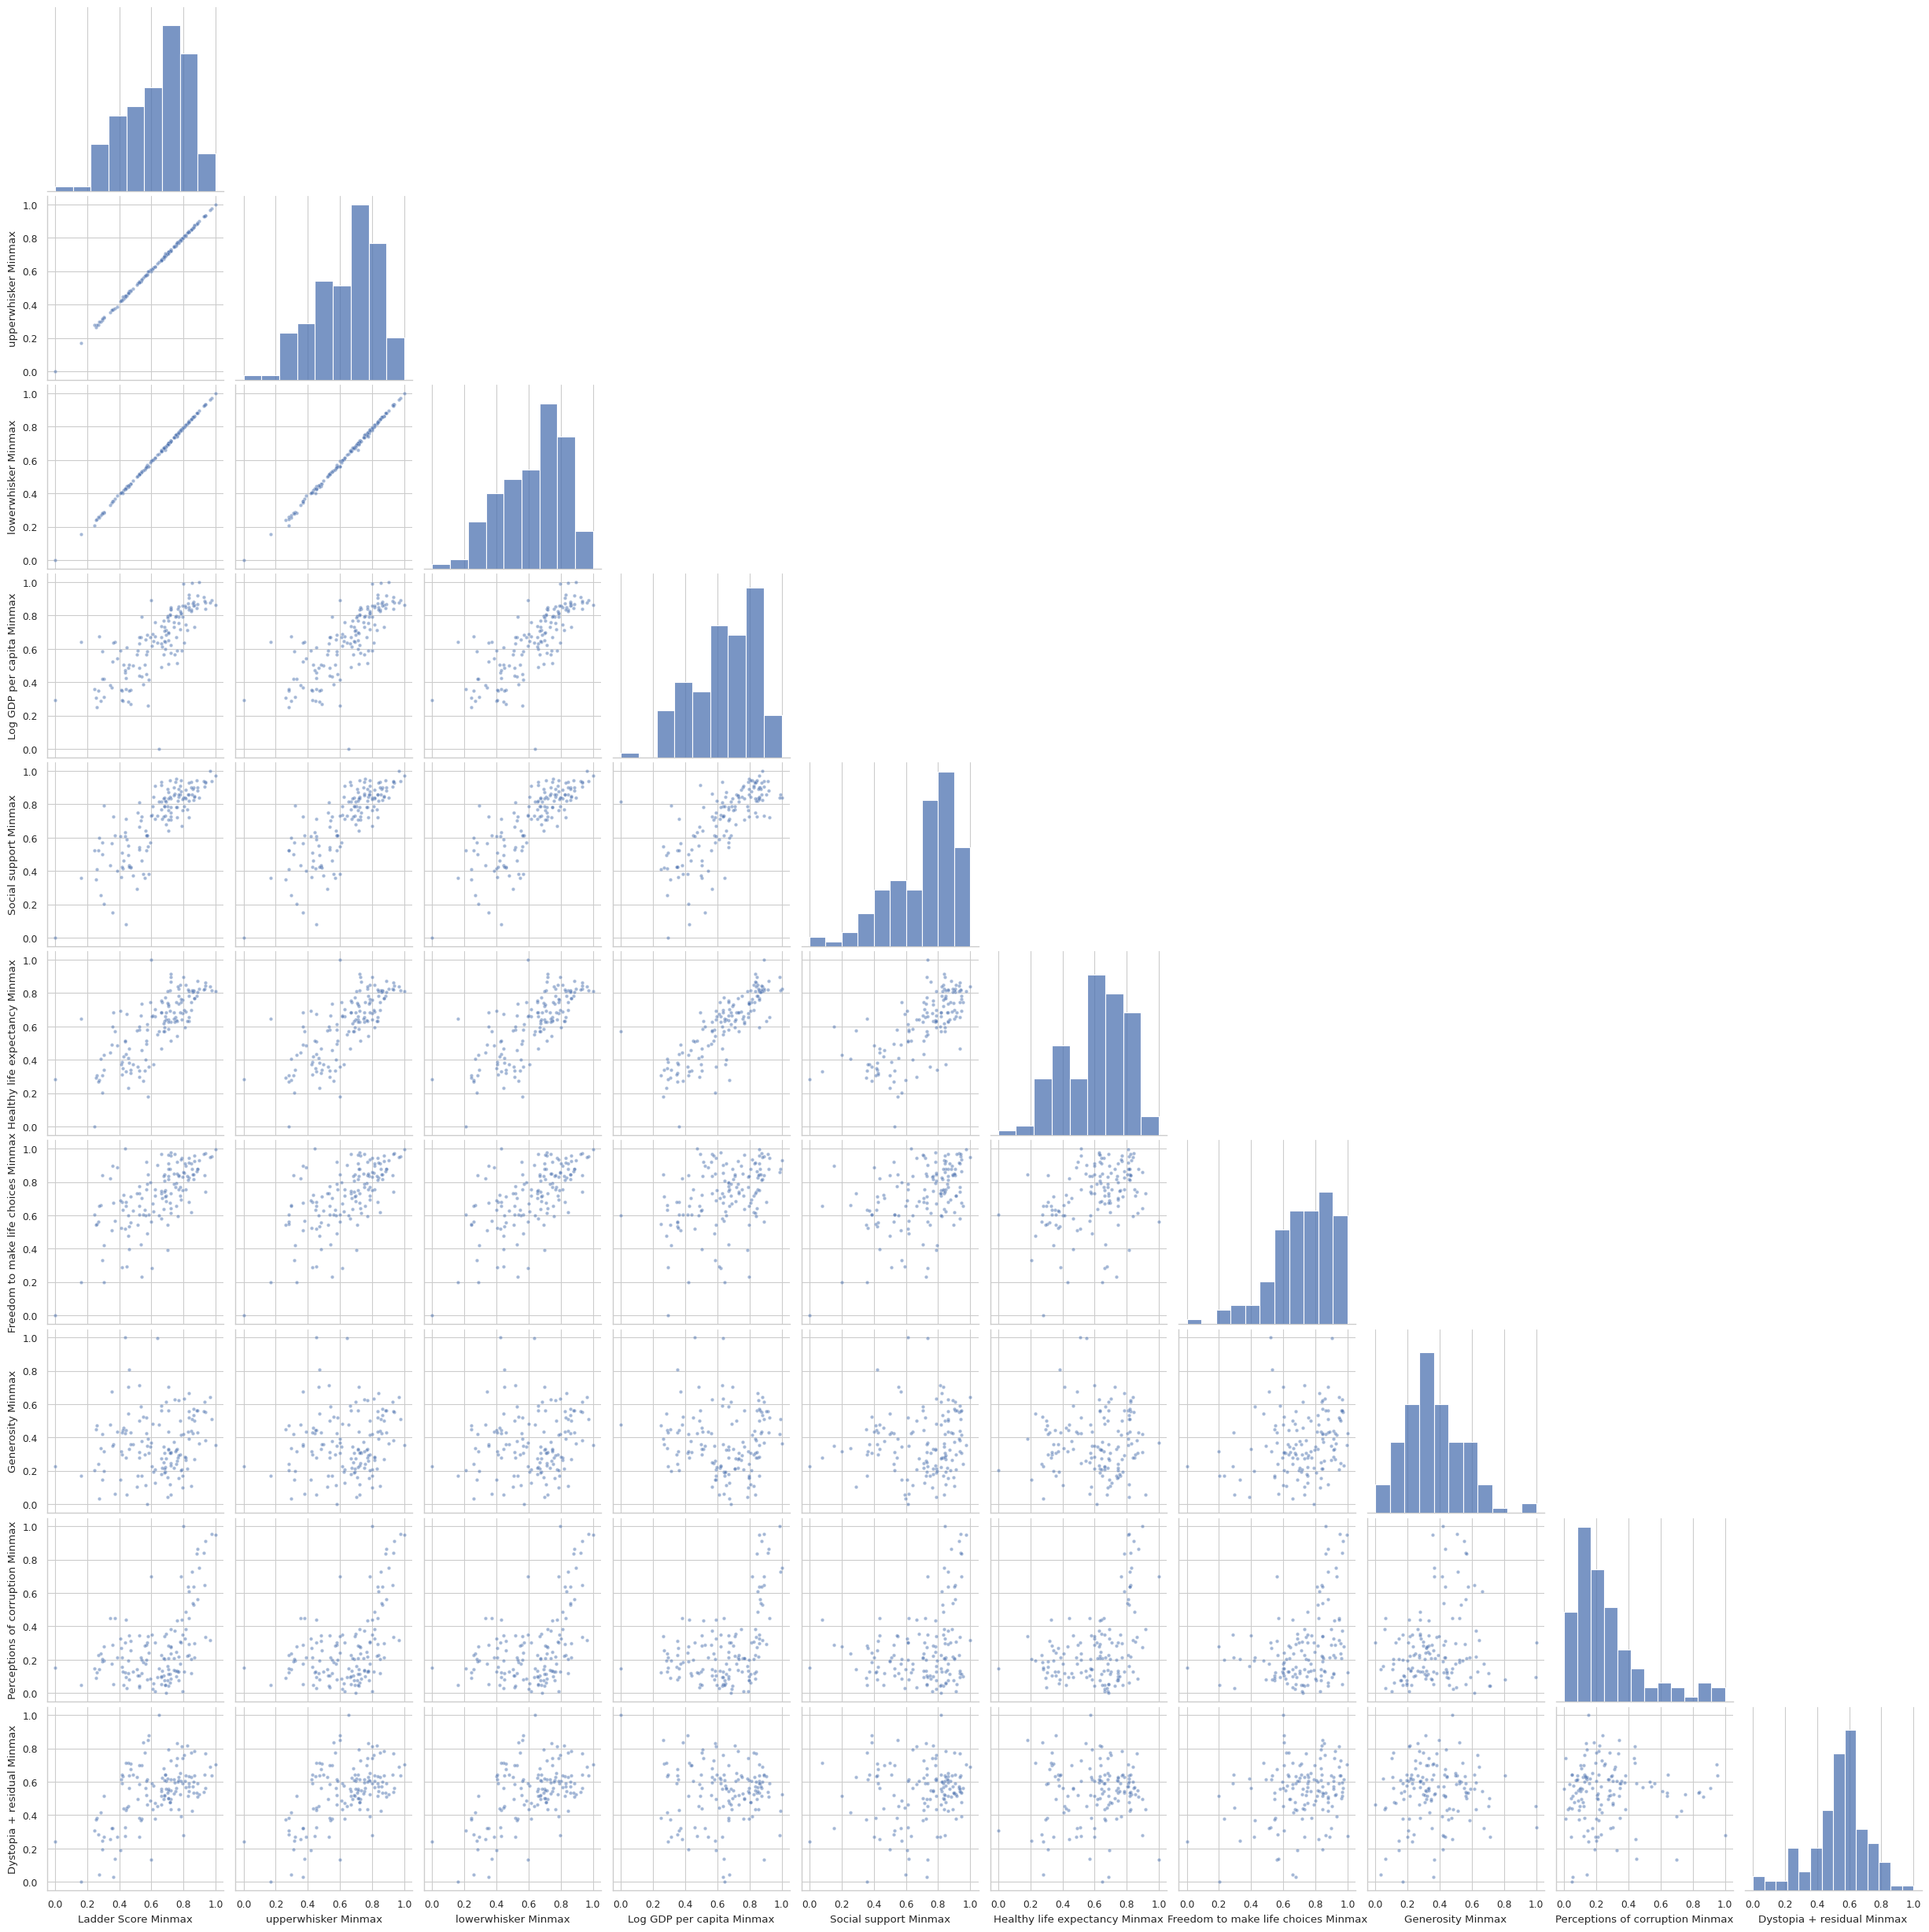

In [ ]:
cols = [
    "Ladder Score Minmax",
    "upperwhisker Minmax",
    "lowerwhisker Minmax",
    "Log GDP per capita Minmax",
    "Social support Minmax",
    "Healthy life expectancy Minmax",
    "Freedom to make life choices Minmax",
    "Generosity Minmax",
    "Perceptions of corruption Minmax",
    "Dystopia + residual Minmax"
]

sns.set(style="whitegrid", context="paper")
sns.pairplot(hapiness[cols], corner=True, plot_kws={'s': 10, 'alpha': 0.5})
plt.show()

Figure 2: This figure is the same as figure 1, except that the data has been scaled using Minmax.

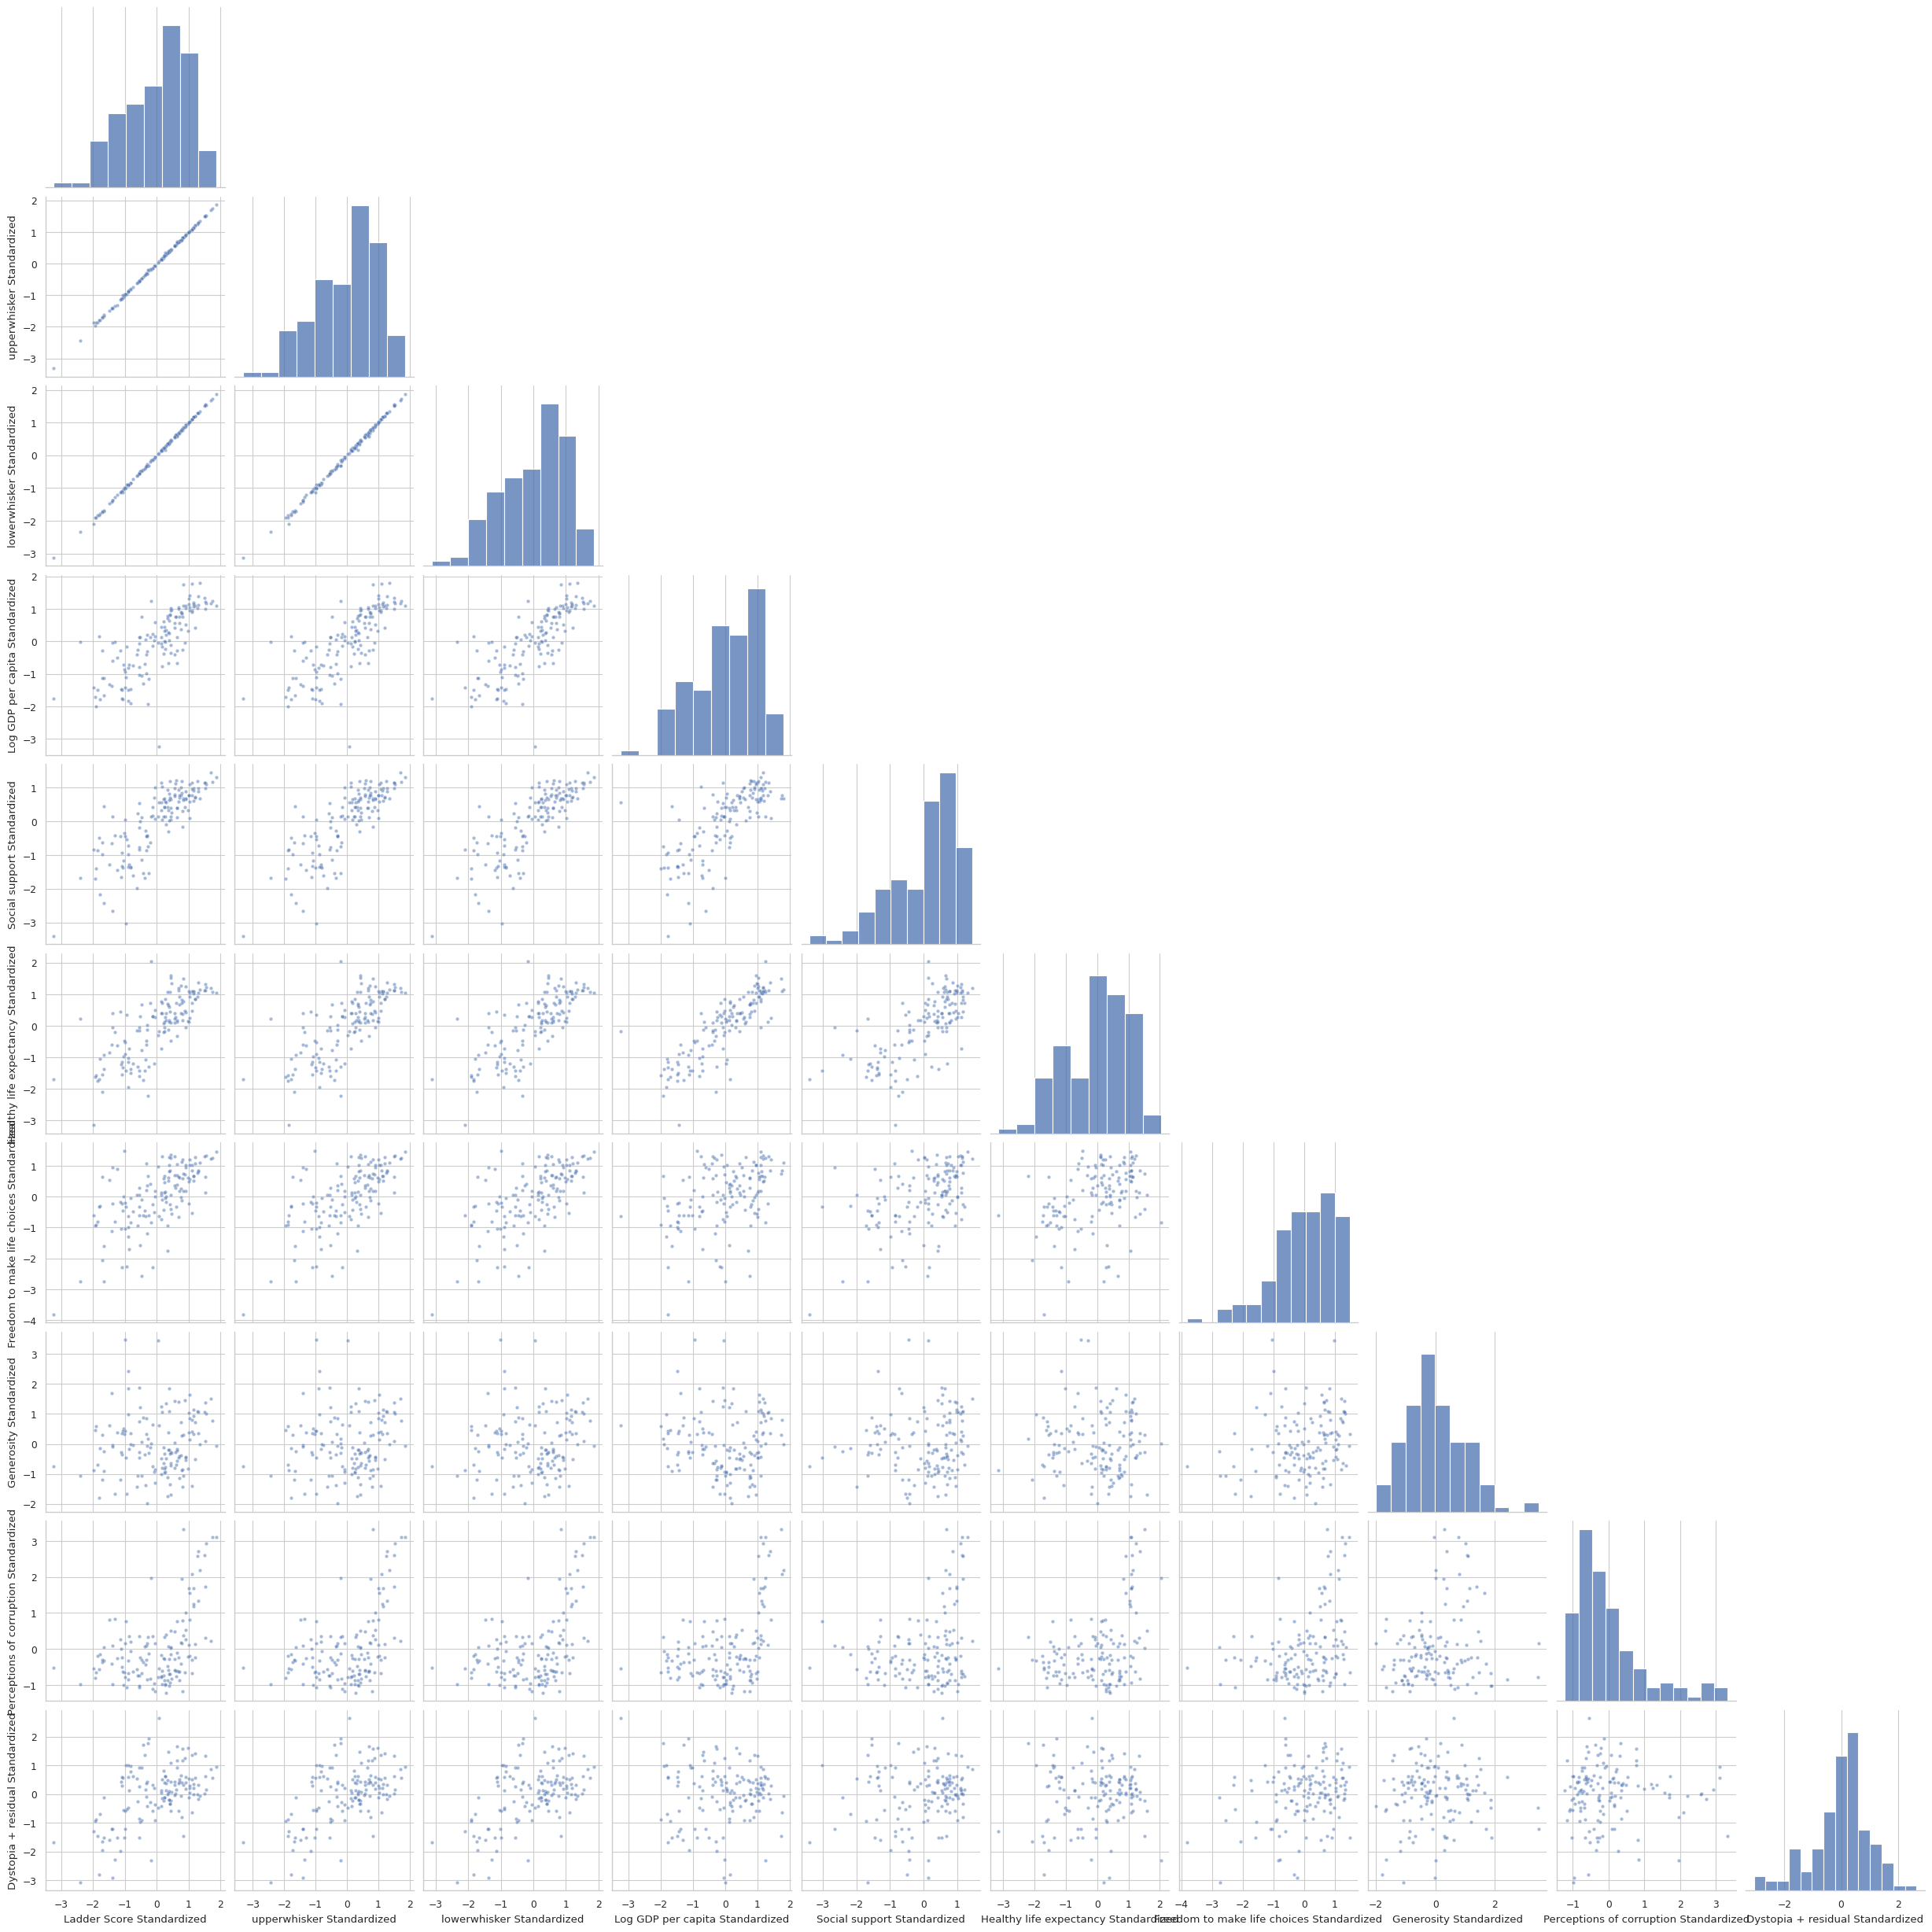

In [ ]:
cols = [
    "Ladder Score Standardized",
    "upperwhisker Standardized",
    "lowerwhisker Standardized",
    "Log GDP per capita Standardized",
    "Social support Standardized",
    "Healthy life expectancy Standardized",
    "Freedom to make life choices Standardized",
    "Generosity Standardized",
    "Perceptions of corruption Standardized",
    "Dystopia + residual Standardized"
]

sns.set(style="whitegrid", context="paper")
sns.pairplot(hapiness[cols], corner=True, plot_kws={'s': 10, 'alpha': 0.5})
plt.show()

Figure 3: This figure is the same as figure 1, except the data has been scaled using Standadization.

### Task 5

In [ ]:
np.random.seed(484)
labels={}
col = [
    "Social support Minmax",
    "Healthy life expectancy Minmax",
    "Freedom to make life choices Minmax",
    "Generosity Minmax",
    "Perceptions of corruption Minmax",
    "Dystopia + residual Minmax"]
kall = [[] for y in range(6)]
kall[0] = hapiness[col[0]]
kall[1] = hapiness[col[1]]
kall[2] = hapiness[col[2]]
kall[3] = hapiness[col[3]]
kall[4] = hapiness[col[4]]
kall[5] = hapiness[col[5]]
kall = np.array(kall)
kall = kall.T
#find the clusters for every N
clf = sklearn.cluster.KMeans(3, n_init='auto')
#get the cluster label for every point
labels = clf.fit_predict(kall) #.reshape(100,2)


In [ ]:
for i in [0,1,2]:
  mean = 0
  count = 0
  cluster_count = 0
  for label in labels:
    if label == i:
      mean += hapiness["Ladder score"].iloc[count]
      cluster_count += 1
    count += 1
  mean = mean/cluster_count
  print(mean, cluster_count)

6.905045454545455 22
4.244041666666667 48
5.981428571428572 70


### Task 6

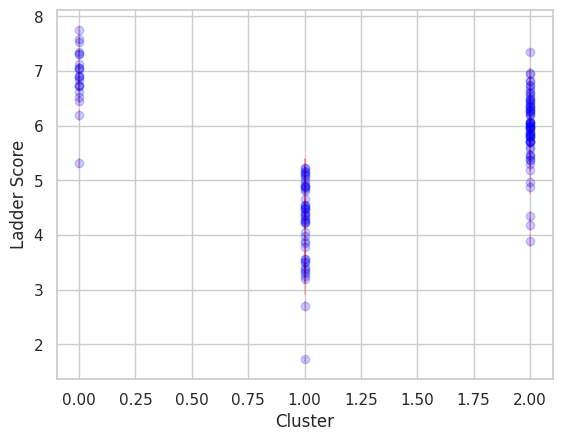

In [ ]:
sns.set(style="whitegrid", context="notebook")
plt.errorbar(labels, hapiness["Ladder score"], yerr=[hapiness["upperwhisker"]-hapiness["Ladder score"],hapiness["Ladder score"]-hapiness["lowerwhisker"]], fmt='o', color='blue', alpha=0.2, ecolor="red")
plt.xlabel("Cluster")
plt.ylabel("Ladder Score")
plt.show()

Figure 4: This is a plot of the Ladder Score, versus the cluster value that was assigned to it. In red are the error bars. They are red in order to aid with visibility as they are quite small. As we see, with three clusters, we have the cluster corresponding to a value of zero, has a Ladder score mean of 6.9 with 22 countries. The cluster corresponding to a value of 1 has a Ladder score mean of 4.2 with 68 countries, and the cluster corresponding to a value of 2 has a mean of 6 with 70 countries. These values show to me that this is fairly good clustering, as each cluster has a significant number of countries and a fairly different mean from the other clusters. All of this shows me that this clustering is good.

### Task 7

In [ ]:
vs = {}
labels={}
kall = [[] for y in range(6)]
kall[0] = hapiness[col[0]]
kall[1] = hapiness[col[1]]
kall[2] = hapiness[col[2]]
kall[3] = hapiness[col[3]]
kall[4] = hapiness[col[4]]
kall[5] = hapiness[col[5]]
kall = np.array(kall)
kall = kall.T
nclusters = range(2,8) #[1,2,3,4,5,6,8,10,13,18,25]#,32,64]
# 4 loop over N=1 to N=25 clusters
for j,n_c in enumerate(nclusters):
    #find the clusters for every N
    clf = sklearn.cluster.KMeans(n_clusters=n_c, n_init='auto')
    #get the cluster label for every point
    labels[n_c] = clf.fit_predict(kall) #.reshape(100,2)
    #calculate the intercluster variance for the model
    vs[n_c] = clf.inertia_

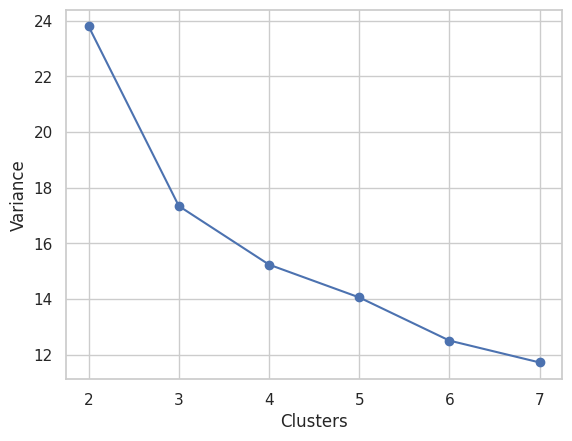

In [ ]:
plt.plot(nclusters, vs.values(), 'bo-')
plt.xlabel('Clusters')
plt.ylabel('Variance')
plt.show()

Figure 5: This is an elbow plot. On the Y axis we have the Variance, and on the X axis we have the number of clusters. As we can see the variance falls sharply from 2 to 3 clusters, and then it has an almost linear decrease in variance. One thing to notice is that the slope changes drastically from between 2-3 and 3-4. Because the variance isn't decreasing as dramatically after 3, I think that the best number of clusters is 3.